In [1]:
import zipfile
import random
import tensorflow as tf
from tensorflow import keras
import h5py
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *

from keras import optimizers
import scipy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import imageio
import pandas as pd
from keras.models import *



2024-10-01 09:06:26.654553: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 09:06:26.865670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 09:06:26.865693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 09:06:26.893677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 09:06:26.948339: I tensorflow/core/platform/cpu_feature_guar

In [2]:
all_data_dir = '/home/user/Desktop/personal/linkon/Alzheimer/OASIS'



print(os.listdir(all_data_dir))



['Mild Dementia', 'Very mild Dementia', 'Moderate Dementia', 'Non Demented']


In [3]:
images = []
labels = []

for folder in os.listdir(all_data_dir):
    subfolder_path2=os.path.join(all_data_dir,folder)
    for image_filename in os.listdir(subfolder_path2):
        image_path = os.path.join(subfolder_path2, image_filename)
        images.append(image_path)
        labels.append(folder)
all_df = pd.DataFrame({'image': images, 'label': labels})
all_df

,image,label
0,/home/user/Desktop/personal/linkon/Alzheimer/O...,Mild Dementia
1,/home/user/Desktop/personal/linkon/Alzheimer/O...,Mild Dementia
2,/home/user/Desktop/personal/linkon/Alzheimer/O...,Mild Dementia
3,/home/user/Desktop/personal/linkon/Alzheimer/O...,Mild Dementia
4,/home/user/Desktop/personal/linkon/Alzheimer/O...,Mild Dementia
...,...,...
86432,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented
86433,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented
86434,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented
86435,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented


In [4]:
all_df['label'] = all_df['label'].replace({'Mild Dementia': 'Moderate Dementia'})
all_df['label'] = all_df['label'].replace({'Very mild Dementia': 'Mild Dementia'})
all_df['label'].value_counts()

label
Non Demented         67222
Mild Dementia        13725
Moderate Dementia     5490
Name: count, dtype: int64

In [5]:
all_df_edited = all_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_df_edited.head()

,image,label
0,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented
1,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented
2,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented
3,/home/user/Desktop/personal/linkon/Alzheimer/O...,Moderate Dementia
4,/home/user/Desktop/personal/linkon/Alzheimer/O...,Non Demented


/tmp/ipykernel_998793/3004188932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=all_df_edited.label, palette='Set2')


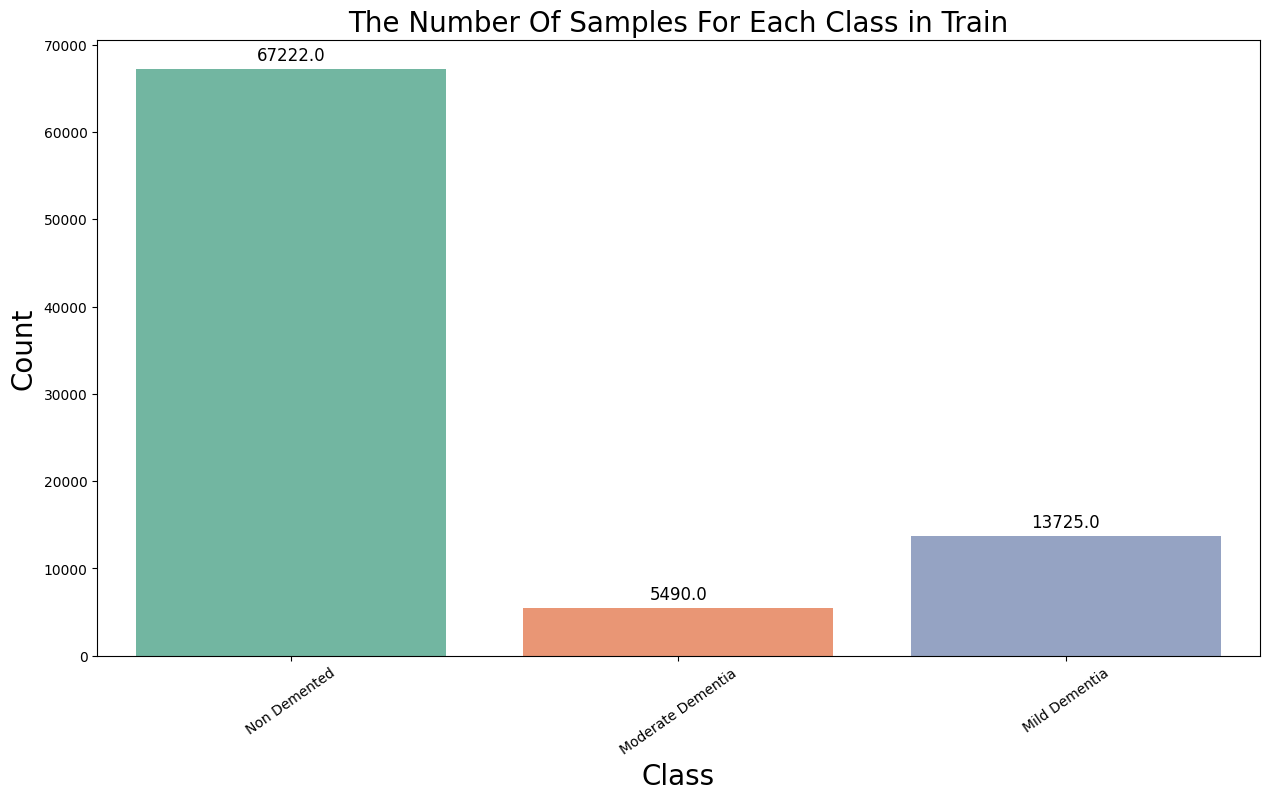

In [6]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=all_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in Train', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

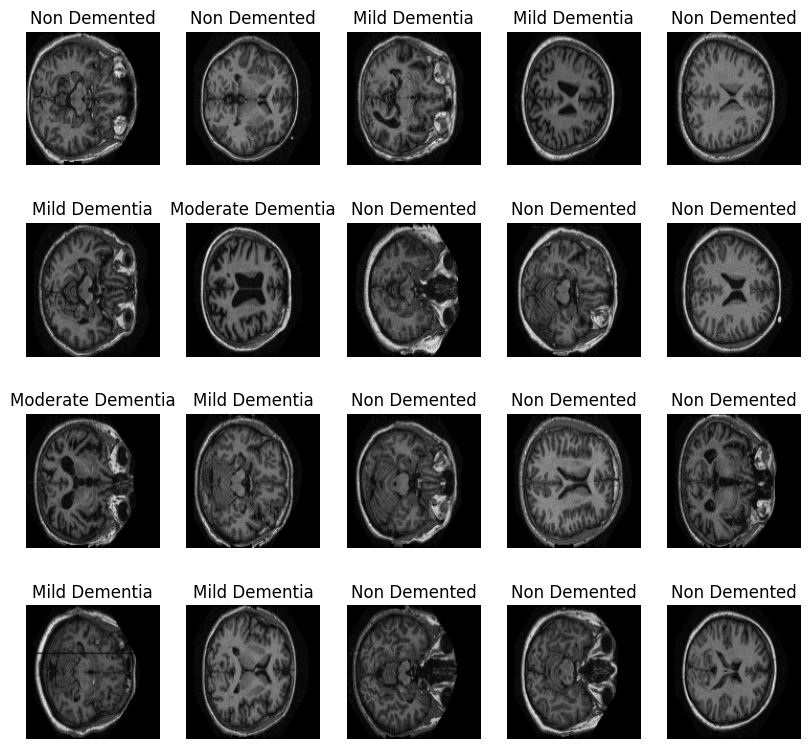

In [7]:
plt.figure(figsize=(10,12))

for n,i in enumerate(np.random.randint(0,len(all_df_edited),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(all_df_edited.image[i])
    img=cv2.resize(img,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(all_df_edited.label[i],fontsize=12)

In [8]:
temp_df_edited, test_df_edited = train_test_split(all_df_edited, test_size=0.15, stratify=all_df_edited['label'], random_state=43)
train_df_edited, val_df_edited = train_test_split(temp_df_edited, test_size=0.15, stratify=temp_df_edited['label'], random_state=43)


train_df_edited = train_df_edited.reset_index(drop=True)
val_df_edited = val_df_edited.reset_index(drop=True)
test_df_edited = test_df_edited.reset_index(drop=True)
train_df_edited.shape, test_df_edited.shape, val_df_edited.shape

((62450, 2), (12966, 2), (11021, 2))

/tmp/ipykernel_998793/1169724873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=test_df_edited.label, palette='Set2')


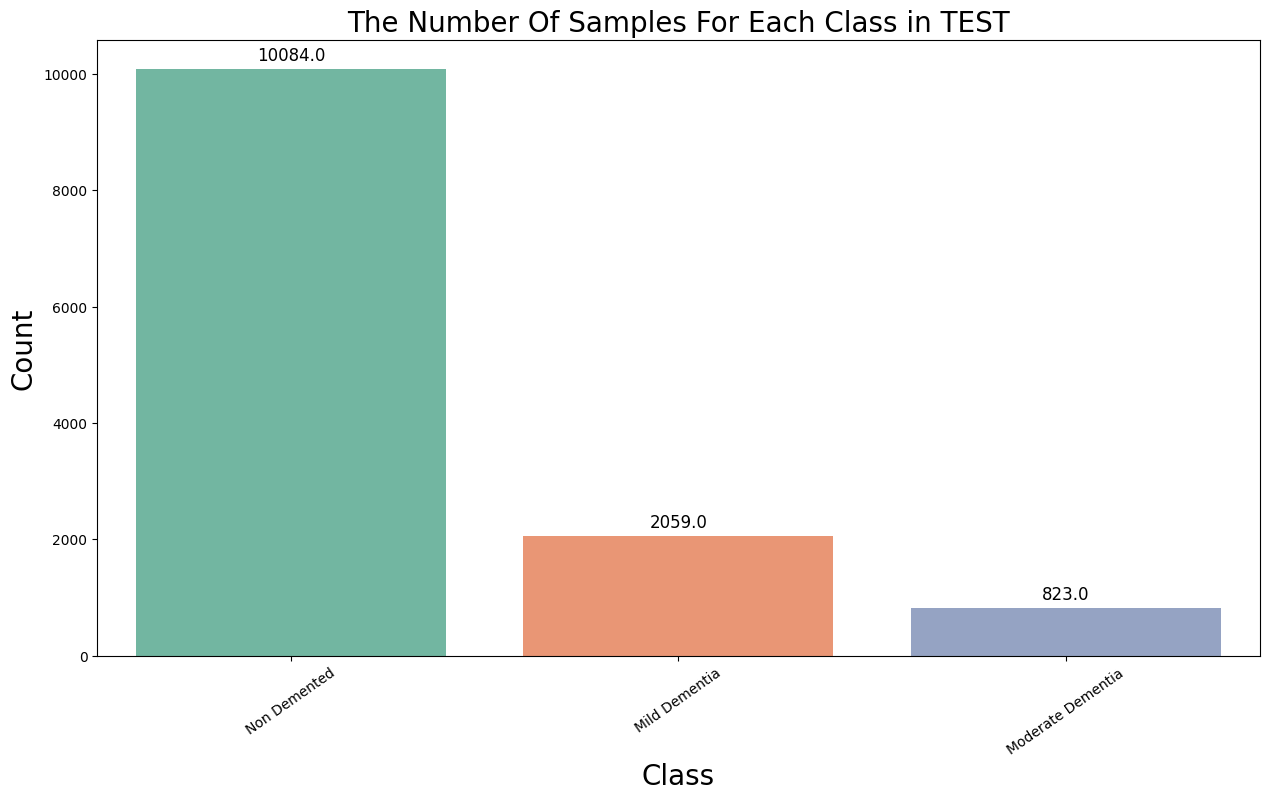

In [9]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=test_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

/tmp/ipykernel_998793/3995720465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_df_edited.label, palette='Set2')


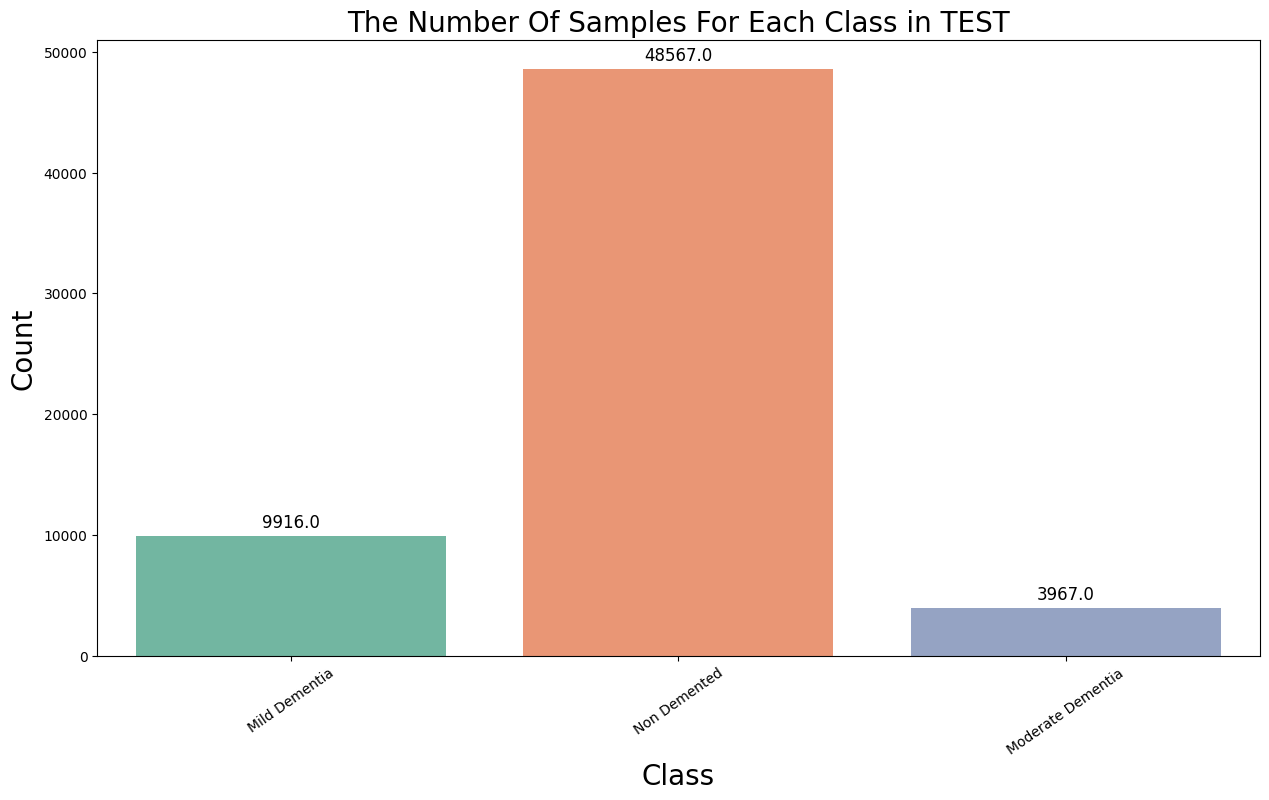

In [10]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=train_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

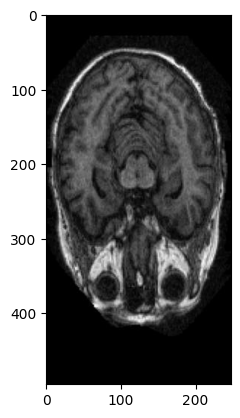

In [12]:
image = cv2.imread('/home/user/Desktop/personal/linkon/Alzheimer/OASIS/Mild Dementia/OAS1_0028_MR1_mpr-1_117.jpg')
        
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_rgb)

In [13]:
def load_resize_normalize_data(df, target_size=(128, 128)):
    images = []
    labels = []
    
    label_encoder = LabelEncoder()
    for index, row in df.iterrows():
   
        image_path = row['image']
        image = cv2.imread(image_path)
        

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# Convert to RGB format
        image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
        resized_image = cv2.resize(image_rgb, (128,128))
        

        normalized_image = resized_image / 255.0 
        
        # Store the resized and normalized image and its corresponding label
        images.append(normalized_image)
        labels.append(row['label'])
  
    encoded_labels_lb = label_encoder.fit_transform(labels)
    
    class_mapping ={ 'Non Demented': 2,  'Mild Dementia':0, 'Moderate Dementia':1}
    
    y_mapped =df['label'].map(class_mapping)
    y_one_hot = to_categorical(y_mapped, num_classes=3)
    return np.array(images), np.array(encoded_labels_lb), label_encoder.classes_, y_one_hot




In [14]:
train_images, train_encoded_labels, classes, train_one_hot = load_resize_normalize_data(train_df_edited)



In [15]:
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
     horizontal_flip=True)

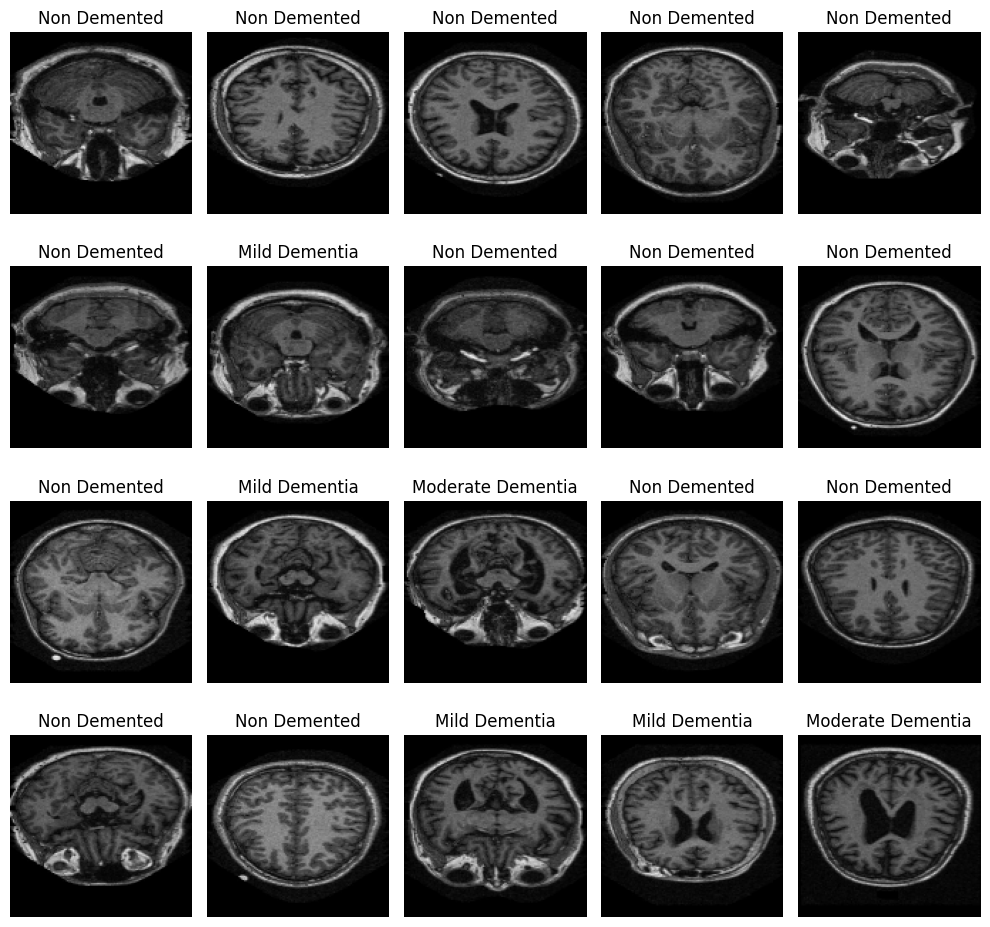

In [16]:
label_decoder = {2: 'Non Demented',  0: 'Mild Dementia', 1: 'Moderate Dementia'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(train_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = train_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[train_encoded_labels[i]], fontsize=12)

plt.tight_layout()

In [17]:
train_gen = train_datagen.flow(train_images, train_one_hot, batch_size=8, shuffle=True)

# Val Processing

In [18]:
val_images, val_encoded_labels, val_classes, val_one_hot = load_resize_normalize_data(val_df_edited)



In [19]:
print("Shape of images array:", val_images.shape)
print("Shape of encoded labels array:", val_encoded_labels.shape)
print("Classes:", val_classes)
# print("One HOt clases:", val_one_hot)
print("One HOt clases:", val_one_hot.shape)

Shape of images array: (11021, 128, 128, 3)
Shape of encoded labels array: (11021,)
Classes: ['Mild Dementia' 'Moderate Dementia' 'Non Demented']
One HOt clases: (11021, 3)


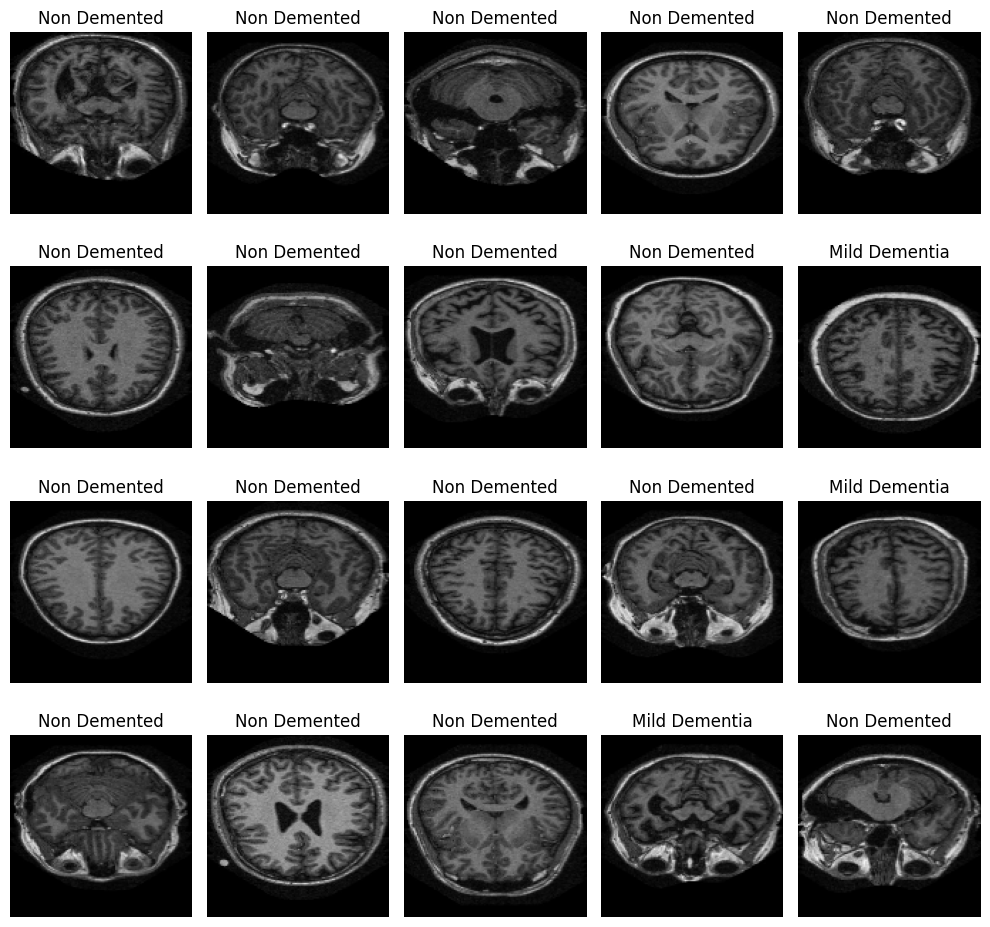

In [20]:
label_decoder = {2: 'Non Demented',  0: 'Mild Dementia', 1: 'Moderate Dementia'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(val_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = val_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[val_encoded_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

# Test preprocessing

In [21]:
test_images, test_encoded_labels, test_classes, test_one_hot = load_resize_normalize_data(test_df_edited)



In [22]:
print("Shape of images array:", test_images.shape)
print("Shape of encoded labels array:", test_encoded_labels.shape)
print("Classes:", test_classes)
# print("One HOt clases:", test_one_hot)
print("One HOt clases:", test_one_hot.shape)

Shape of images array: (12966, 128, 128, 3)
Shape of encoded labels array: (12966,)
Classes: ['Mild Dementia' 'Moderate Dementia' 'Non Demented']
One HOt clases: (12966, 3)


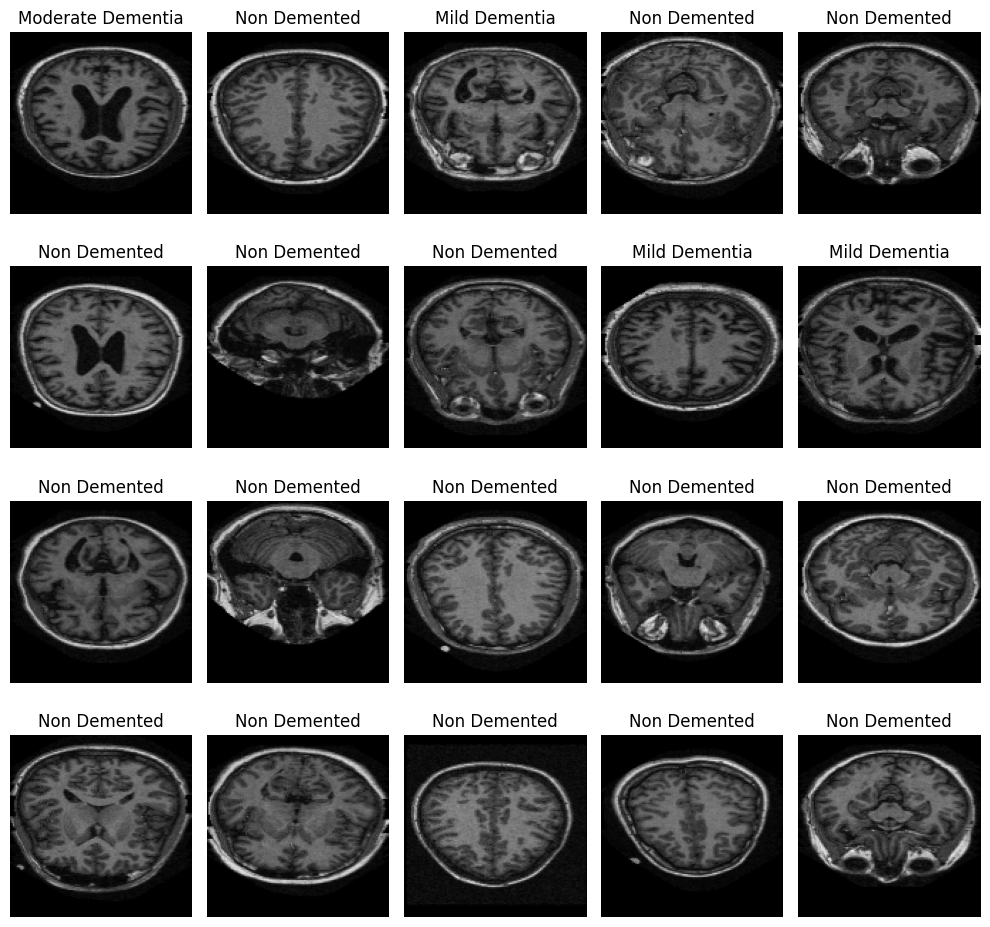

In [23]:
label_decoder = {2: 'Non Demented',  0: 'Mild Dementia', 1: 'Moderate Dementia'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(test_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = test_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[test_encoded_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

# Data generator

In [24]:
valid_datagen = ImageDataGenerator(
    preprocessing_function=None 
)


In [25]:
batch_size=8
val_gen = valid_datagen.flow(val_images, val_one_hot, batch_size=8, shuffle=False)
test_gen = valid_datagen.flow(test_images, test_one_hot, batch_size=1, shuffle=False)

In [26]:
from keras import backend as K

IMG_CHANNELS=3
IMG_WIDTH = 128
IMG_HEIGHT = 128

if K.image_data_format() == 'channels_first':
    input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [27]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import *
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.8,
        staircase=True)


print(lr_schedule.get_config())


{'initial_learning_rate': 0.0001, 'decay_steps': 10000, 'decay_rate': 0.8, 'staircase': True, 'name': None}


In [28]:
class ExpandDimsLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

In [29]:
class Reshapelayer(Layer):
    def __init__(self, dim, **kwargs):
        super(Reshapelayer, self).__init__(**kwargs)
        self.dim = dim

    def call(self, inputs):
        return tf.reshape(inputs, [tf.shape(inputs)[0], self.dim, 1])

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dim, 1)
    
    
class ReduceMeanLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ReduceMeanLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=self.axis)

In [30]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [31]:
class RootMeanSquaredError(tf.keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super(RootMeanSquaredError, self).__init__(name=name, **kwargs)
        self.mse = tf.keras.metrics.MeanSquaredError()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.mse.update_state(y_true, y_pred, sample_weight)

    def result(self):
        return tf.sqrt(self.mse.result())

    def reset_states(self):
        self.mse.reset_states()

In [32]:
def line1(x):
    # received shape: (64, 64, 3)
    conv_1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#     pool_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    
    # Increase to 3D
    reshaped_1 = ExpandDimsLayer(axis=-1)(conv_1)
    print("received shape:", reshaped_1.shape)
    maxpool_1 = MaxPool3D(pool_size=(3, 3, 3))(reshaped_1)
    print("line_1 maxpool ", maxpool_1.shape)
#     extra_line_1 = line3D_1(maxpool_1)
    
    
    block1_conv1 = Conv2D(32, (1, 1), activation='relu', padding='same')(conv_1)
    block1_pool = MaxPool2D(2, 2)(block1_conv1)

    block2_conv1 = Conv2D(64, (7, 7), activation='relu', padding='same')(block1_pool)
    block2_pool = MaxPool2D(2, 2)(block2_conv1)

    global_pool = GlobalAveragePooling2D()(block2_conv1)
    fully_connected_1 = Dense(128, activation='relu')(global_pool)

    return fully_connected_1#, extra_line_1

def line2(x):
    # received shape: (32, 32, 3)
    print("received shape: line_2", x.shape)

    conv_1 = Conv2D(64, (7, 7), activation='relu', padding='same')(x)
   
    # increase dimension
    reshaped_1 = ExpandDimsLayer(axis=-1)(conv_1)
    block1_pool = MaxPool3D(pool_size=(3, 3, 3,))(reshaped_1)
    
    
    print("received shape: line_2Pool ", block1_pool.shape)
#     extra_line_1 = line3D_1(block1_pool)
#     print("received shape: extra_line2 ",extra_line_1.shape)
    
    

    block1_conv1 = Conv2D(32, (5, 5), activation='relu', padding='same')(conv_1)
    block1_pool = MaxPool2D(2, 2)(block1_conv1)

    
    global_pool = GlobalAveragePooling2D()(block1_pool)
    global_pool = Dropout(0.2)(global_pool)

    fully_connected_1 = Dense(128, activation='relu')(global_pool)
    fully_connected_1 = Dropout(0.2)(fully_connected_1)

    return fully_connected_1#, extra_line_1

def line3(x):
    # received shape: (16, 16, 3)
    print("received shape: (16, 16, 3)", x.shape)

    conv_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    reshaped_1 = ExpandDimsLayer(axis=-1)(conv_1)
#     extra_line_1 = line3D_1(reshaped_1)

    block1_conv1 = Conv2D(32, (2, 2), activation='relu', padding='same')(conv_1)
#     block1_pool = MaxPool2D(2, 2)(block1_conv1)

    block2_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(block1_conv1)
    block2_pool = AvgPool2D(2, 2)(block2_conv1)

    global_pool = GlobalAveragePooling2D()(block2_pool)

    fully_connected_1 = Dense(128, activation='relu')(global_pool)
    return fully_connected_1#, extra_line_1

def line3D_1(x):
    # For the 3D convolution
    print("Line3d shape", x.shape)
#     conv_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#     print("Line3d conv1_shape", conv_1.shape)

#     reshaped_2 = tf.expand_dims(conv_1, axis=-1)
#     print(reshaped_2.shape)
    conv_1 = Conv3D(32, (4, 4, 4), activation='relu', padding='same')(x)
#     conv_1 = MaxPool3D(pool_size=(2, 2, 2))(conv_1)
    conv_1 = Conv3D(64, (2, 2, 2), activation='relu', padding='same')(conv_1)
#     conv_1 = MaxPool3D(pool_size=(2, 2, 2))(conv_1)
    conv_1 = Conv3D(128, (2, 2, 2), activation='relu', padding='same')(conv_1)
#     conv_1 = MaxPool3D(pool_size=(2, 2, 2))(conv_1)
    conv_1 = GlobalAveragePooling3D()(conv_1)
    conv_1 = Dropout(0.3)(conv_1)
    out = Dense(128, activation='relu')(conv_1)
    return out

def line4(x):
    # The LSTM network after the 2D Sub-unit
    # received shape: (16, 16, 3)
    print("received shape: (16, 16, 3)", x.shape)
    conv_1 = Conv2D(512, (14, 14), activation='relu', padding='same')(x)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)
    conv_1 = BatchNormalization()(conv_1)
    reshaped = Reshape((conv_1.shape[1] * conv_1.shape[2], conv_1.shape[3]))(conv_1)
    lstm_1 = LSTM(12, return_sequences=False)(reshaped)
    flat = Flatten()(lstm_1)
    out = Dense(128, activation='relu')(flat)
    return out

def line5(x):
    # The parallel sequential LSTM feature optimizer
    print(x.shape)
    reshaped = Reshape((x.shape[1] * x.shape[2], x.shape[3]))(x)  # Reshape for LSTM
    x = BatchNormalization()(reshaped)
    lstm1 = Bidirectional(LSTM(16, return_sequences=False))(x)
    out = Dense(128, activation='relu')(lstm1)
    return out

In [33]:
def get_model(num_classes):
    signal = Input(shape=(128, 128, 3), dtype=np.float32, name='signal')
    f_lstm = line5(signal)

    # converting to (32, 32, 3):
    conv_1 = Conv2D(64, (5,5), activation='relu', padding='same', strides=1)(signal)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)  # (32, 32, 3)
    print("Conv1", conv_1.shape)

#     f1, f1_3d = line1(conv_1)
#     print(f1.shape, f1_3d.shape)
    f1 = line1(conv_1)
    print(f1.shape)

    # converting to (16, 16, 3):
    conv_1 = Conv2D(128, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = MaxPool2D(pool_size=(3,3))(conv_1)  # (16, 16, 3)
    print("Conv1_2", conv_1.shape)

#     f2, f2_3d = line2(conv_1)
    f2 = line2(conv_1)

    # converting to (8, 8, 3):
    conv_1 = Conv2D(128, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = MaxPool2D(4)(conv_1)  # (8, 8, 3)

#     f3, f3_3d = line3(conv_1)
    f3= line3(conv_1)

    # converting to (8, 8, 3): # same input for line4 function
    f4 = line4(conv_1)

  
    
    f1 = Reshapelayer(dim=128)(f1)
    f2 = Reshapelayer(dim=128)(f2)
    f3 = Reshapelayer(dim=128)(f3) 
    f4 = Reshapelayer(dim=128)(f4) #tf.reshape(f4, [tf.shape(signal)[0], 128, 1])
    f5 = Reshapelayer(dim=128)(f_lstm)
#     f6 = Reshapelayer(dim=128)(f1_3d) 
#     f7 = Reshapelayer(dim=128)(f2_3d)
#     f8 = Reshapelayer(dim=128)(f3_3d)

    concat = Concatenate()([f1, f2, f3, f4, f5])#, f6, f7, f8])
#     concat = tf.reduce_mean(concat, axis=2)
    concat = ReduceMeanLayer(axis=2)(concat)

    dense_1 = Dense(128, activation='relu')(concat)
    dense_2 = Dense(32, activation='relu')(dense_1)
    out = Dense(num_classes, activation='softmax')(dense_2)

    model = Model(inputs=signal, outputs=[out])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),  metrics=[tf.keras.metrics.CategoricalAccuracy(
                    name='accuracy'),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                    tf.keras.metrics.AUC(num_thresholds=200,curve="ROC",summation_method="interpolation",name="AUC",dtype=None,thresholds=None,
                    multi_label=True,label_weights=None,),
                    tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives(),
                    F1Score(name='f1_score'),
                    tf.keras.metrics.MeanAbsoluteError(name='MAE'),
                    tf.keras.metrics.MeanAbsolutePercentageError(name='MAPE'),
                    RootMeanSquaredError(name='RMSE')]) 
    
    return model

if __name__ == "__main__":
    model = get_model(3)
    model.summary()

(None, 128, 128, 3)


2024-10-01 09:08:04.861532: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 09:08:05.010027: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 09:08:05.010579: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Conv1 (None, 64, 64, 64)
received shape: (None, 64, 64, 256, 1)
line_1 maxpool  (None, 21, 21, 85, 1)
(None, 128)
Conv1_2 (None, 21, 21, 128)
received shape: line_2 (None, 21, 21, 128)
received shape: line_2Pool  (None, 7, 7, 21, 1)
received shape: (16, 16, 3) (None, 5, 5, 128)
received shape: (16, 16, 3) (None, 5, 5, 128)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 signal (InputLayer)         [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         4864      ['signal[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0       

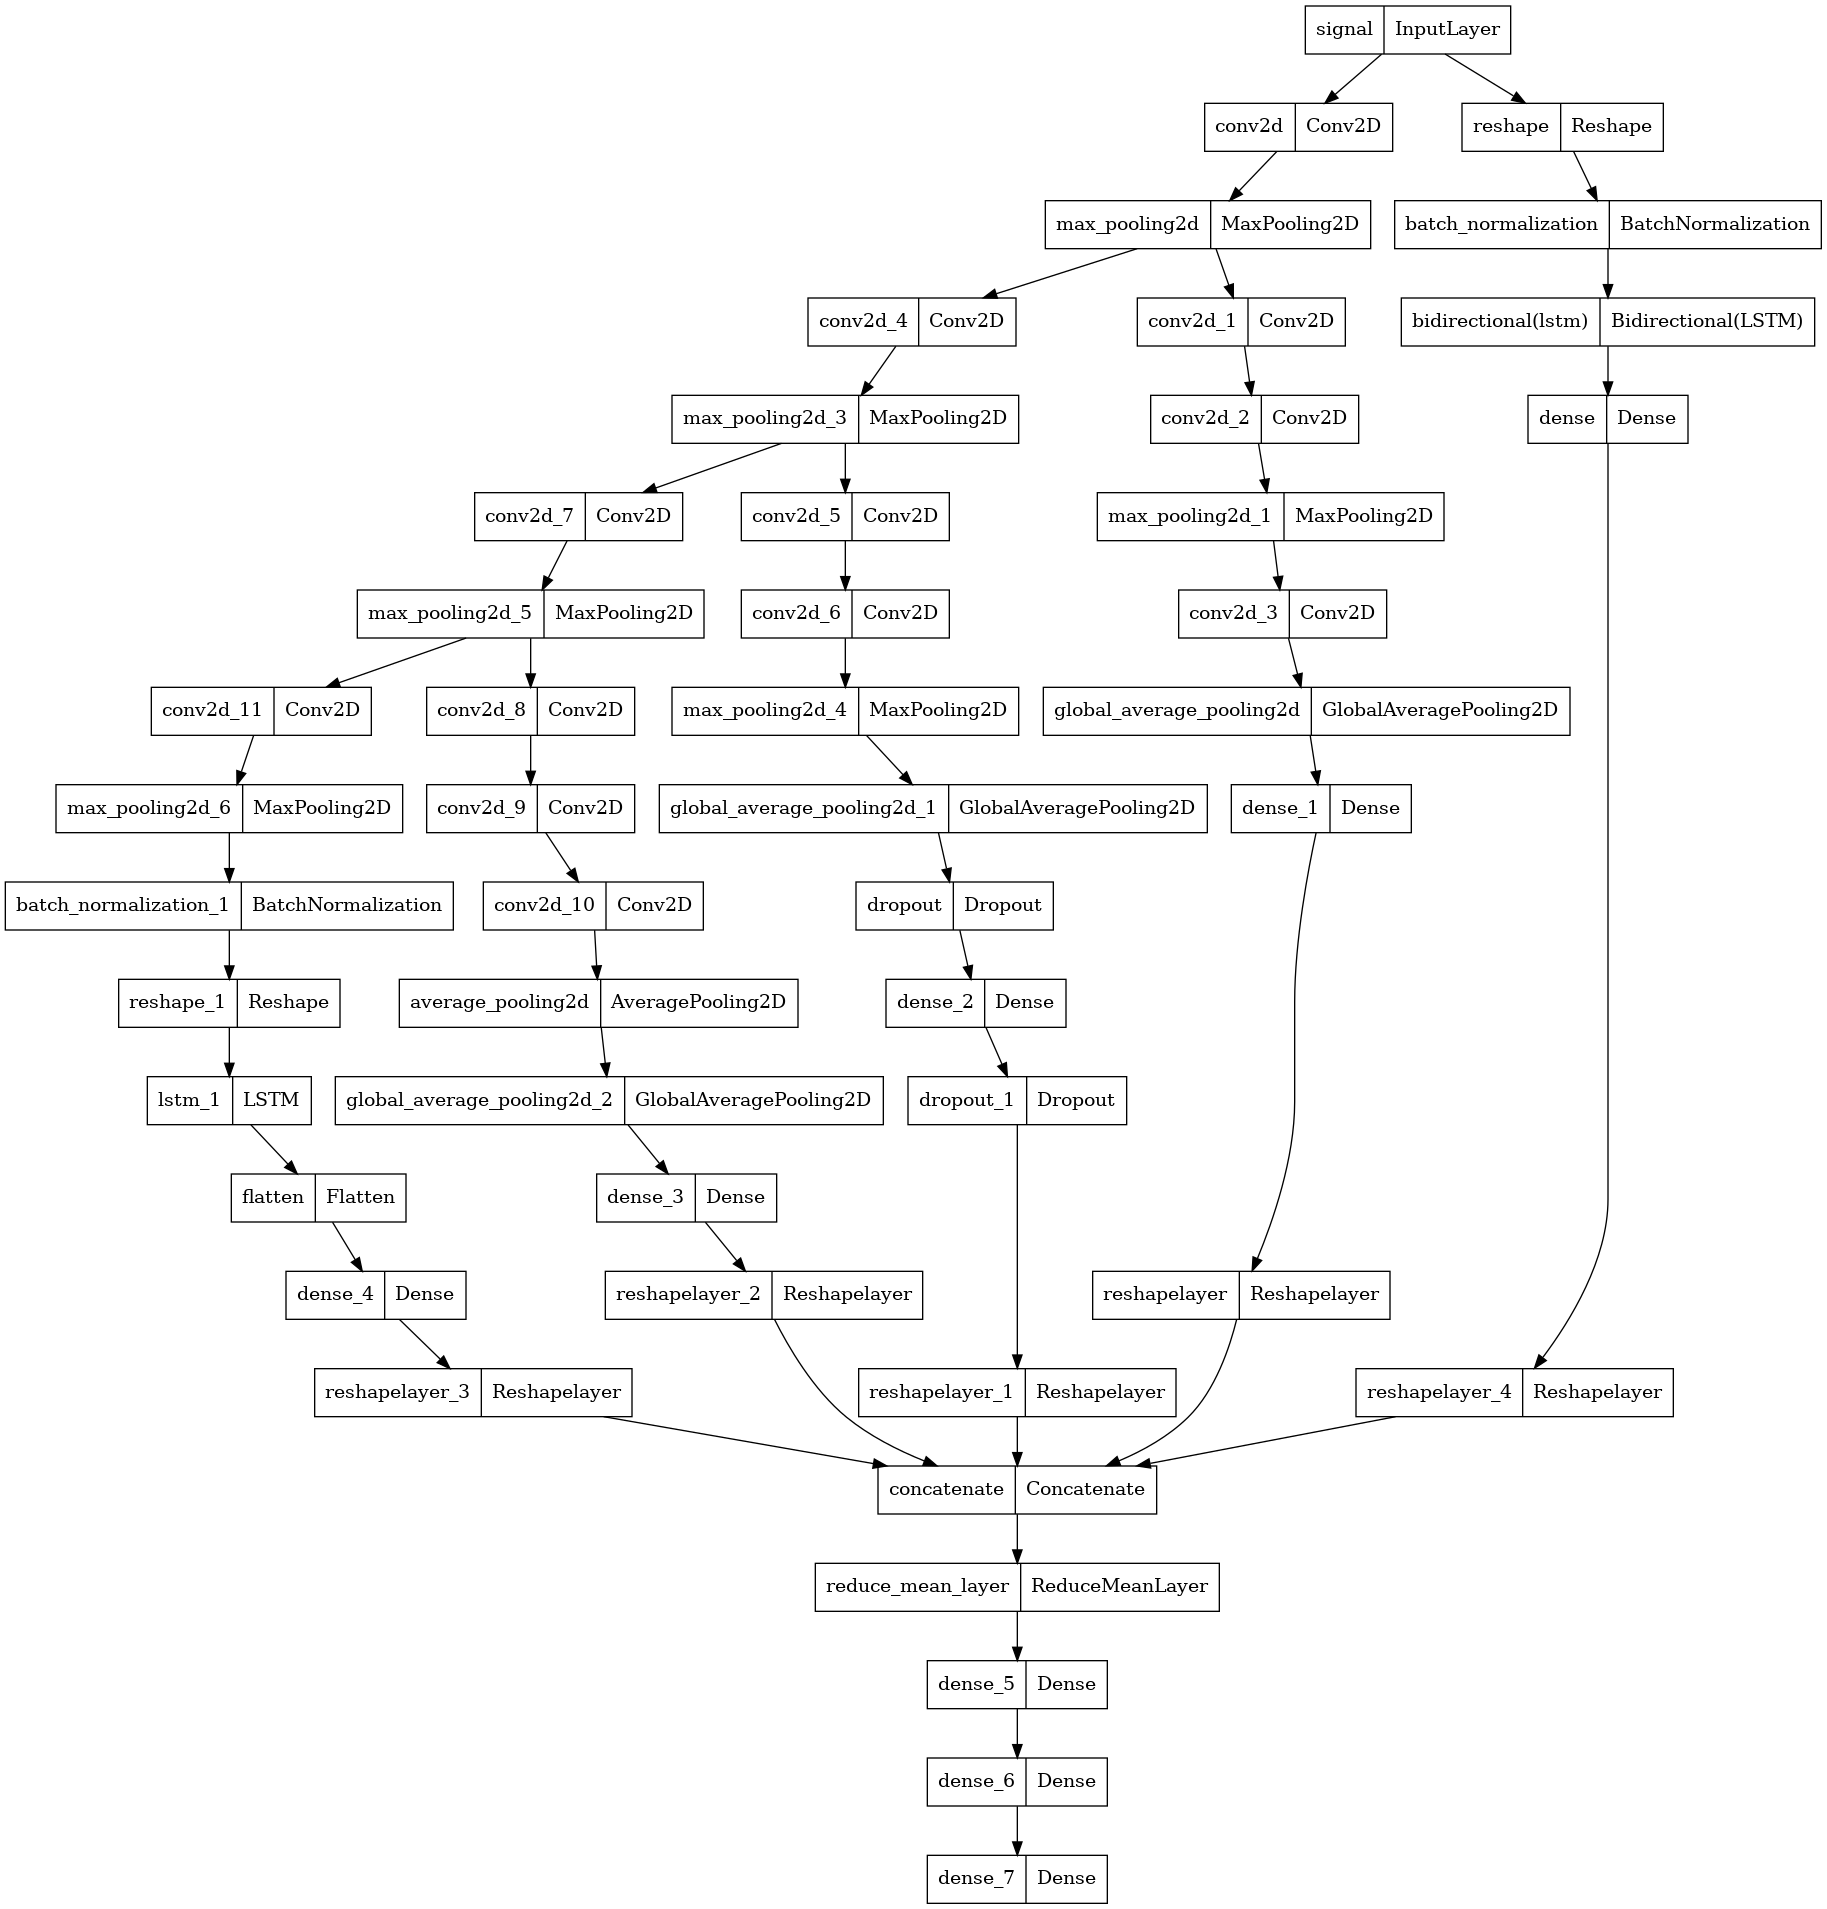

In [34]:
tf.keras.utils.plot_model(model, to_file='./Proposed_Model.png')


In [35]:

from tensorflow.keras.callbacks import Callback 
class LearningRateSchedulerWithPatienceIoU(Callback):
    def __init__(self, reduce_lr_factor, patience, min_lr, monitor='val_iou'):
        super(LearningRateSchedulerWithPatienceIoU, self).__init__()
        self.reduce_lr_factor = reduce_lr_factor
        self.patience = patience
        self.min_lr = min_lr
        self.monitor = monitor
        self.wait = 0
        self.best_iou = -float('inf')
#         self.model = model
        
    def on_epoch_end(self, epoch, logs=None):
        current_iou = logs.get(self.monitor, -float('inf'))
        
        if current_iou > self.best_iou:
            self.best_iou = current_iou
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = self.model.optimizer.learning_rate.numpy() * self.reduce_lr_factor
                print(new_lr)
                new_lr = max(new_lr, self.min_lr)
                
                self.model.optimizer.learning_rate.assign(new_lr)
                print(f"\nReduced learning rate to {new_lr} after {self.patience} epochs without improvement in IoU.\n")
                self.wait = 0





In [36]:
# initial_learning_rate = 0.00075  # Initial learning rate
# reduce_lr_factor = 0.5  # Factor by which to reduce the learning rate
# patience = 1  # Number of epochs without improvement in IoU before reducing learning rate
# min_learning_rate = 1e-6  # Minimum learning rate

# # Create the custom learning rate scheduler
# lr_scheduler = LearningRateSchedulerWithPatienceIoU(reduce_lr_factor, patience, min_learning_rate)

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_plateu = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)

In [38]:
train_one_hot.shape

(62450, 3)

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/home/user/Desktop/personal/linkon/Alzheimer/oasis_code/Weights/oasis-3-class-not-balanced-1-oct.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [40]:

history = model.fit(train_gen,epochs=50, validation_data=(val_gen),  callbacks=[checkpoint, lr_plateu],verbose=1)


Epoch 1/50


2024-10-01 09:08:11.252247: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-10-01 09:08:11.403487: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-01 09:08:11.994214: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-01 09:08:11.994270: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-01 09:08:12.064462: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran o

1957/7807 [======>.......................] - ETA: 41:02 - loss: 0.6193 - accuracy: 0.7801 - Recall: 0.7676 - Precision: 0.7858 - AUC: 0.6792 - false_positives: 3276.0000 - false_negatives: 3638.0000 - f1_score: 0.7766 - MAE: 0.2320 - MAPE: 115997792.0000 - RMSE: 0.3387

2024-10-01 09:22:02.303489: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-01 09:22:02.303535: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-01 09:22:02.338383: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-01 09:22:02.338430: W external/local_tsl/tsl/framework/bfc_

7807/7807 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.7847 - Recall: 0.7195 - Precision: 0.8457 - AUC: 0.8212 - false_positives: 8198.0000 - false_negatives: 17518.0000 - f1_score: 0.7775 - MAE: 0.1984 - MAPE: 99190856.0000 - RMSE: 0.3141

/home/user/anaconda3/envs/ecg/lib/python3.9/site-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/home/user/anaconda3/envs/ecg/lib/python3.9/site-packages/keras/src/engine/training.py:2723: UserWarning: Metric RootMeanSquaredError implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()



Epoch 1: val_accuracy improved from -inf to 0.74821, saving model to /home/user/Desktop/personal/linkon/Alzheimer/oasis_code/Weights/oasis-3-class-not-balanced-1-oct.keras
7807/7807 [==============================] - 3562s 455ms/step - loss: 0.5201 - accuracy: 0.7847 - Recall: 0.7195 - Precision: 0.8457 - AUC: 0.8212 - false_positives: 8198.0000 - false_negatives: 17518.0000 - f1_score: 0.7775 - MAE: 0.1984 - MAPE: 99190856.0000 - RMSE: 0.3141 - val_loss: 0.5275 - val_accuracy: 0.7482 - val_Recall: 0.5732 - val_Precision: 0.9723 - val_AUC: 0.8890 - val_false_positives: 180.0000 - val_false_negatives: 4704.0000 - val_f1_score: 0.7212 - val_MAE: 0.2255 - val_MAPE: 112774752.0000 - val_RMSE: 0.3201 - lr: 1.0000e-04
Epoch 2/50
7807/7807 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8132 - Recall: 0.7372 - Precision: 0.8881 - AUC: 0.8995 - false_positives: 5803.0000 - false_negatives: 16410.0000 - f1_score: 0.8056 - MAE: 0.1620 - MAPE: 80978488.0000 - RMSE: 0.2839

In [41]:
import pandas as pd

history_df = pd.DataFrame()


for col in history.history.keys():
    history_df[col] = history.history[col]

history_df.head()
history_df.to_csv('./Proposed_model_3_class_oasis_not_balanced.csv', index=False)

dict_keys(['loss', 'accuracy', 'Recall', 'Precision', 'AUC', 'false_positives', 'false_negatives', 'f1_score', 'MAE', 'MAPE', 'RMSE', 'val_loss', 'val_accuracy', 'val_Recall', 'val_Precision', 'val_AUC', 'val_false_positives', 'val_false_negatives', 'val_f1_score', 'val_MAE', 'val_MAPE', 'val_RMSE', 'lr'])


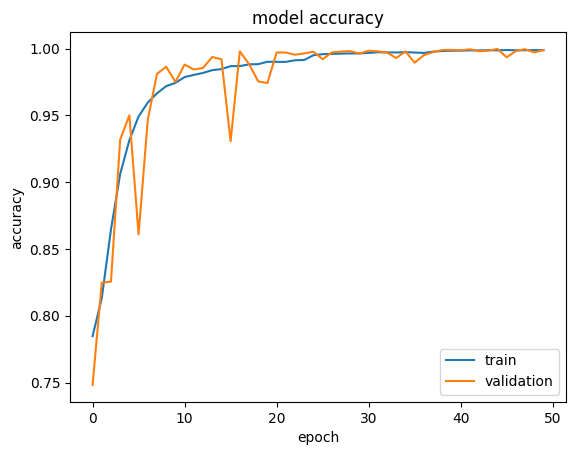

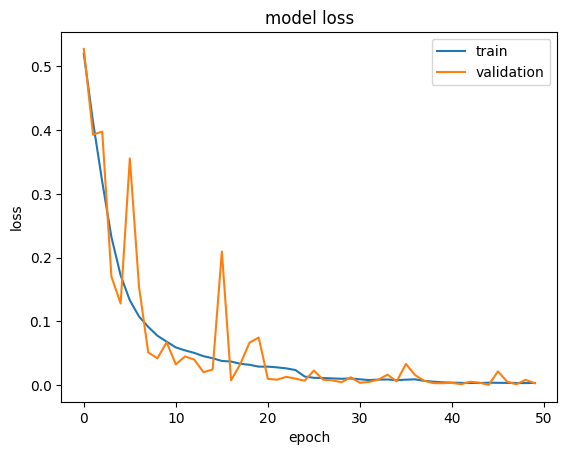

In [42]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [43]:
model.load_weights(checkpoint_path)

In [44]:
# print(model.evaluate(train_images, train_one_hot))

In [45]:
# print(model.evaluate(val_gen))

In [46]:
# print(model.evaluate(test_images, test_one_hot))

In [47]:
print(model.evaluate(test_gen))

/home/user/anaconda3/envs/ecg/lib/python3.9/site-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/home/user/anaconda3/envs/ecg/lib/python3.9/site-packages/keras/src/engine/training.py:2723: UserWarning: Metric RootMeanSquaredError implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


12966/12966 [==============================] - 2278s 176ms/step - loss: 0.0014 - accuracy: 0.9996 - Recall: 0.9996 - Precision: 0.9996 - AUC: 1.0000 - false_positives: 5.0000 - false_negatives: 5.0000 - f1_score: 0.9996 - MAE: 5.0419e-04 - MAPE: 252093.5156 - RMSE: 0.0156
[0.0014259176095947623, 0.9996143579483032, 0.9996143579483032, 0.9996143579483032, 0.9999985098838806, 5.0, 5.0, 0.9996142983436584, 0.0005041877739131451, 252093.515625, 0.015634045004844666]


In [48]:
# Y_prob = model.predict(test_images[:2000])
# print(Y_prob)

In [49]:
# y_pred = np.argmax(Y_prob, axis=1)
# y_pred

In [50]:
# np.argmax(test_one_hot, axis=1)

In [51]:
# test_encoded_labels

In [52]:
# true_labels = np.argmax(test_one_hot, axis=1)


# num_images = min(12, len(test_images))  # Ensure we don't exceed the number of images available
# columns = 4
# rows = (num_images + columns - 1) // columns  
# fig = plt.figure(figsize=(10, 10))
# label_names = classes  

# for i in range(1, num_images + 1):
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(test_images[i - 1])
# #     actual_label = label_names[true_labels[i - 1]]
#     actual_label = label_names[test_encoded_labels[i - 1]]
#     predicted_label = label_names[y_pred[i - 1]]
#     plt.title(f'Actual: {actual_label}\nPred: {predicted_label}')
#     plt.axis('off')  

# plt.tight_layout()
# plt.show()

In [53]:
# from sklearn.metrics import classification_report


# # Compute accuracy score
# report = classification_report(test_encoded_labels, y_pred, target_names=classes)

# # Print classification report
# print("Classification Report:")
# print(report)

In [54]:
# def calculate_metrics(pred_classes, gt_classes):
    


#     accuracy = np.mean(pred_classes == gt_classes)

   
#     confusion_matrix = np.zeros((4, 4), dtype=int)
#     np.add.at(confusion_matrix, (gt_classes, pred_classes), 1)

#     sensitivity = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

#     true_negatives = np.sum(confusion_matrix) - np.sum(np.diag(confusion_matrix))
#     specificity = true_negatives / (np.sum(confusion_matrix) - np.sum(np.diag(confusion_matrix)))

#     metrics = {
#         'accuracy': accuracy,
#         'sensitivity': sensitivity,
#         'specificity': specificity
#     }
    
#     return metrics

In [55]:
# print(calculate_metrics(y_pred, test_encoded_labels))

In [56]:
# def plot_confusion_matrix (cm):
#     plt.figure(figsize = (10,10))
#     sns.heatmap(
#         cm, 
#         cmap = 'Reds', 
#         linecolor = 'black', 
#         linewidth = 1, 
#         annot = True, 
#         fmt = '', 
#         xticklabels = classes, 
#         yticklabels = classes)
    
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.title('Confusion Matrix')
#     plt.show()
    


In [57]:
# from sklearn.metrics import confusion_matrix
# plot_confusion_matrix(confusion_matrix(test_encoded_labels, y_pred))

In [58]:
# def plot_confusion_matrix_perc(cm, classes):
#     # Convert confusion matrix to percentages
#     cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
#     plt.figure(figsize=(10, 10))
#     sns.heatmap(
#         cm_percentage, 
#         cmap='Reds', 
#         linecolor='black', 
#         linewidth=1, 
#         annot=True, 
#         fmt='.2f',  # format the annotations to 2 decimal places
#         xticklabels=classes, 
#         yticklabels=classes
#     )
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.title('Confusion Matrix (Percentage)')
#     plt.show()

In [59]:
# from sklearn.metrics import confusion_matrix
# plot_confusion_matrix_perc(confusion_matrix(test_encoded_labels, y_pred), classes)